In [1]:
Word="/Users/esthermensah/Downloads/ud120-projects-master/tools/word_data.pkl"

In [2]:
Authors="/Users/esthermensah/Downloads/ud120-projects-master/tools/email_authors.pkl"

In [ ]:
import pandas as pd
import pickle

In [4]:
Authors_file =  pd.read_pickle(Authors)

In [5]:
Word_file= pd.read_pickle(Word)

In [7]:
x = Word_file
y= Authors_file

In [8]:
from sklearn.model_selection import train_test_split

In [9]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

In [11]:
### text vectorization -Convert from strings to lists of numbers
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed  = vectorizer.transform(X_test)

In [12]:
### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
selector = SelectPercentile(f_classif, percentile=30)
selector.fit(X_train_transformed, y_train)
X_train_transformed = selector.transform(X_train_transformed).toarray()
X_test_transformed  = selector.transform(X_test_transformed).toarray()

In [13]:
### info on the data
print("no. of Chris training emails:", sum(y_train))
print("no. of Sara training emails:", len(y_train)-sum(y_train))
    

no. of Chris training emails: 6161
no. of Sara training emails: 6143


In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

Gaussian Score: 
 98.01
Gaussian Test Score: 
 97.35
Accuracy: 
 0.9734546833522942
[[2510  124]
 [  16 2624]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2634
           1       0.95      0.99      0.97      2640

    accuracy                           0.97      5274
   macro avg       0.97      0.97      0.97      5274
weighted avg       0.97      0.97      0.97      5274



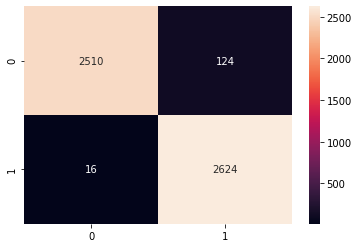

In [16]:
gaussian = GaussianNB()
gaussian.fit(X_train_transformed, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test_transformed)

gauss_score = round(gaussian.score(X_train_transformed, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test_transformed, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")